# Disease Prediction

## 2.0- EDA warmup

In [2]:
# improting relative packages for Data analysis 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the data set. This is a data set about cardiovascular disease
disease = "../data/cardio_train.csv"

df_disease = pd.read_csv(disease, sep=";") # using sep to separate the columns on the ";"

In [4]:
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df_disease.info() # The data set has no nan values. However with further research about the subject we may find outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## a)

In [6]:
# To answer this question I need to look at the cardio column. 0 is represented as NO and 1 is represented as yes
neg_cardio = (df_disease["cardio"].value_counts()[0]) # doing value counts to see how many 0 are in the column cardio
pos_cardio = (df_disease["cardio"].value_counts()[1]) # doing value count to see how many 1 are in the column cardio

# Using f string to to neatly answer the question
print(f"The amount of people in the data frame who have a positive cardiovascular disease  is {neg_cardio}")
print(f"The amount of people in this data frame who have a negative cardiovascular disease is {pos_cardio}")
print(f"This is out of {neg_cardio + pos_cardio} people")

The amount of people in the data frame who have a positive cardiovascular disease  is 35021
The amount of people in this data frame who have a negative cardiovascular disease is 34979
This is out of 70000 people


## b)

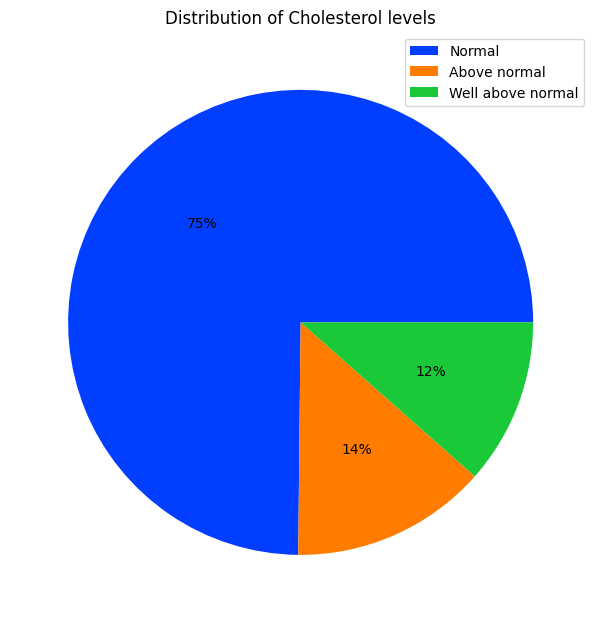

In [7]:
# To answer this question about cholesterol:  number 1 represents "normal", number 2 "above normal" and number 3 "well above normal"

norm_chol = (df_disease["cholesterol"].value_counts()[1]) # creating variables that have the amounts of each stage of cholesterol
above_chol = (df_disease["cholesterol"].value_counts()[2])
well_above_chol = (df_disease["cholesterol"].value_counts()[3])

# creating the size of the charts area
fig,ax = plt.subplots(1,1, figsize =(7.5,9))

# creating lists with the data and labels
data = [norm_chol, above_chol, well_above_chol]  
keys = ["Normal", "Above normal", "Well above normal"] 

# giving the pie chart a bright color palette
palette_color = sns.color_palette("bright")

# plotting the data on the chart, autopct gives percentage to 0 decimal
plt.pie(data,colors=palette_color, autopct="%.0f%%")

# adding a legend to the plot
plt.legend(keys, loc="best")

# plotting a title
plt.title("Distribution of Cholesterol levels")

# display the chart
plt.show()


## c)

In [8]:
# This question is to visualize the age column, as it is in days I need to convert it to years for better reading.
# I can do this by dividing the age column by 365.2425
df_disease["age"] = round(df_disease["age"]/365.2425,2)
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.63,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.84,1,156,56.0,100,60,1,1,0,0,0,0


Text(0.5, 1.0, 'Chart of age distribution in the data frame')

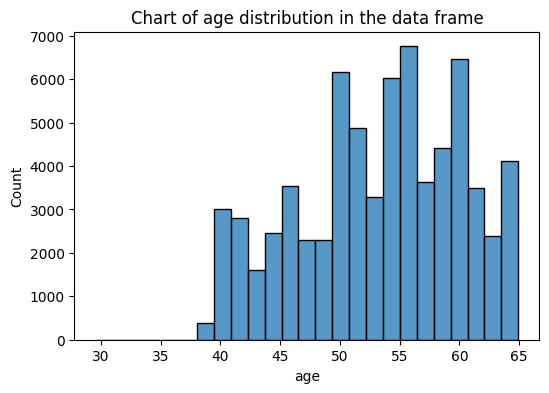

In [9]:
# creating the amount of plots and size of the graph
fig,ax = plt.subplots(1,1, figsize =(6,4))

sns.histplot(data=df_disease, x="age", bins=25 )

# add a title
plt.title("Chart of age distribution in the data frame")

As you can see the majority of ages are from the late 30's up until the age of 65. This shows that the data frame has no data from patients over 65. From a describe of the data frame it shows that the age range is from 30 to 65. However the data from 30 to the mid 30's is under 1000 patients 

## d)

The amount of smokers is 1810 and the amount of non smokers is 17978


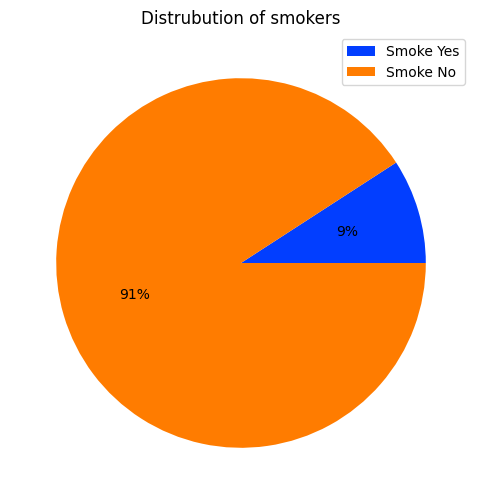

In [53]:
# the value of 0 represents "No" the value of 1 represents "Yes"
smoke_yes = (df_disease["smoke"].value_counts()[1]) # creating variables that have the amounts of each stage of smoke
smoke_no = (df_disease["smoke"].value_counts()[0])

# Printing a result of 
print(f"The amount of smokers is {smoke_yes} and the amount of non smokers is {smoke_no}")

# creating data to be used in the plot and the labels
data = [smoke_yes, smoke_no]
labels = ["Smoke Yes", "Smoke No"]
#setting the figsize
fig, ax = plt.subplots(1,1 ,figsize=(6,6))
# plotting a title
plt.title("Distrubution of smokers")
# plotting pie chart
plt.pie(data,colors=palette_color,autopct="%.0f%%")
# plotting legend
plt.legend(labels, loc="best")

plt.show();

We can see from this data that there is a big portion of the subjects are none smokers. 

## e)

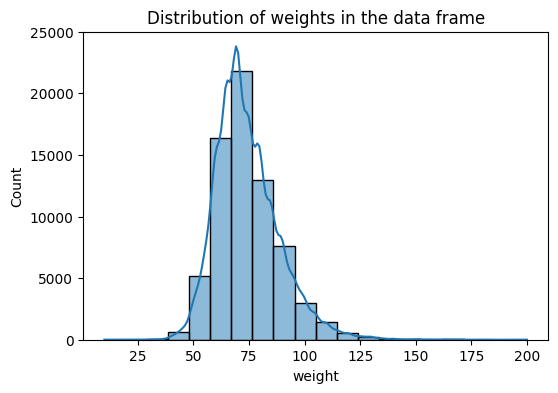

In [11]:
# setting the dimensions for the plot
fig,ax = plt.subplots(1,1, figsize=(6,4))

# settings for the histogram, added in kde to see the distribution of the mode values 
sns.histplot(data=df_disease, x="weight", bins=20, kde=True )

plt.title("Distribution of weights in the data frame")

plt.show();

From the visualization here we can see that many people within the dataset are in and around the 75 kg area. There are also some obvious outliers here on either side. 

## f)

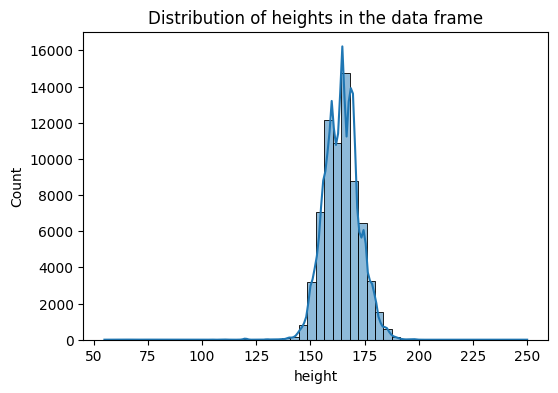

In [12]:

fig,ax = plt.subplots(1,1, figsize=(6,4))

sns.histplot(data=df_disease, x="height", bins=50, kde=True )

plt.title("Distribution of heights in the data frame")

plt.show();

In this visualization we can see that many people are within the 140 cm to 180 cm range, with many with a mode average at around 170. There are definate outliers in the height columns as well. People measuring as little as 55 cm and big as 250 cm

## g)

To understand the following: 
- The gender column is represented as: 1 = Female and 2 = Male
- Within the cardio column: 0 = NO and 1 = Yes

In [13]:
# creating a dataframe based on gender and cardiovascular disease
gender_disease =  df_disease.groupby(["gender", "cardio"]).size().reset_index(name="Total")
gender_disease


,gender,cardio,Total
0,1,0,22914
1,1,1,22616
2,2,0,12107
3,2,1,12363


In [14]:
# creating a data frrame with just female cardio disease
df_fem_car = gender_disease.iloc[:2]
df_fem_car

,gender,cardio,Total
0,1,0,22914
1,1,1,22616


In [15]:
# creating a data frame with just male cardio disease information
df_male_car = gender_disease.iloc[2:]
df_male_car

,gender,cardio,Total
2,2,0,12107
3,2,1,12363


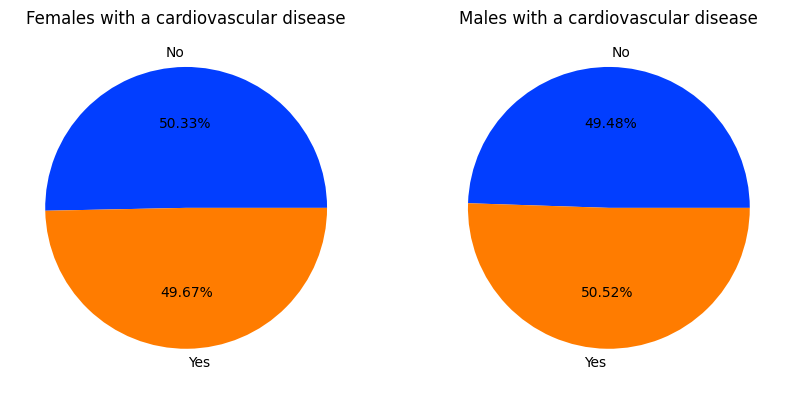

In [16]:
labels = ["No", "Yes"]
# This is a plot with 2 graphs, so the the subplots must be 1 row and 2 columns
fig, ax = plt.subplots(1,2, figsize=(10,5))

# setting female cardiovascular to axes 0
ax[0].pie(df_fem_car["Total"],colors=palette_color, labels=labels, autopct="%.2f%%")
# setting a title for that female plot 
ax[0].set_title("Females with a cardiovascular disease")

# setting male cardiovascular to axes 1
ax[1].pie(df_male_car["Total"],colors=palette_color, labels=labels, autopct="%.2f%%")
# Settign title for male plot
ax[1].set_title("Males with a cardiovascular disease")
plt.show();

From looking at these graphs we can see that both genders have very similar results with half of each either smoking or not smoking. There seems to be slightly more males that smoke. 

# 2.1.0 Feature engineering BMI

In [17]:
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.63,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.84,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
# creating a column for BMI using the formula weight / height * height
df_disease["BMI"] = round(df_disease["weight"]/((df_disease["height"]/100)**2),2)
df_disease

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.36,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,51.63,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,47.84,1,156,56.0,100,60,1,1,0,0,0,0,23.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.68,2,168,76.0,120,80,1,1,1,0,1,0,26.93
69996,99995,61.88,1,158,126.0,140,90,2,2,0,0,1,1,50.47
69997,99996,52.20,2,183,105.0,180,90,3,1,0,1,0,1,31.35
69998,99998,61.41,1,163,72.0,135,80,1,2,0,0,0,1,27.10


In [19]:
# Checking the BMI for outliers, The min is at 3.4 and the max is at 298. This is impossible. SO i will have to come up with a good relative range
df_disease["BMI"].describe()

count    70000.000000
mean        27.556545
std          6.091405
min          3.470000
25%         23.880000
50%         26.375000
75%         30.220000
max        298.670000
Name: BMI, dtype: float64

## a)

When looking on the internet I have discovered that females typically have been known to be able to survive with a BMI lower than 9 or 10. This  however is not always usual. On average the lowest is about 11 for a woman. In contrast for men it is about 13 BMI. Based on these figures for an average BMI of 12 is the lowest a human can survive.
I will choose to remove outliers that are 12 or lower on the data set 
https://www.ennonline.net/fex/15/limits#:~:text=Based%20on%20these%20figures%20a,James%20et%20al%20(1988).

On the other end of the spectrum it was harder to find an exact figure that showed what the highest BMI should be. Over 50 was considered class 4 obesity and class 5 is considered as over 60. I was thinking that the highest BMI i would consider in this data frame would be 65. 

In [20]:
# keeping values over 12 in BMI category
df_disease = df_disease[df_disease["BMI"].map(df_disease["BMI"].value_counts()) > 12]
# keeping values under 65 in BMI category
df_disease = df_disease[df_disease["BMI"].map(df_disease["BMI"].value_counts()) < 65]
df_disease["BMI"].describe() # CAn see that the minimum in 17.58 and max is 55.56

count    20522.000000
mean        29.218263
std          5.633834
min         17.580000
25%         24.820000
50%         29.320000
75%         33.660000
max         55.560000
Name: BMI, dtype: float64

In [21]:
# This confirms the highest BMI measurements. Do check the min i would change max to min
df_disease[df_disease["BMI"] == df_disease["BMI"].max()] 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
4212,5946,44.11,1,120,80.0,120,80,1,1,0,0,1,0,55.56
6821,9721,58.60,2,120,80.0,140,80,2,2,0,0,1,0,55.56
7305,10412,43.42,1,120,80.0,120,80,1,1,0,0,1,0,55.56
9284,13227,40.02,2,120,80.0,120,80,1,1,0,0,1,0,55.56
11183,15991,60.46,1,120,80.0,120,80,1,1,0,0,1,0,55.56
13952,19912,39.55,2,120,80.0,120,80,1,1,0,0,0,0,55.56
19672,28090,39.83,1,120,80.0,120,80,1,1,0,0,0,1,55.56
22818,32592,46.30,2,120,80.0,120,80,1,3,0,0,1,1,55.56
23024,32895,56.37,1,120,80.0,120,80,1,1,0,0,0,0,55.56
30293,43325,51.45,1,120,80.0,120,80,1,1,0,0,0,1,55.56


## b)

These are the BMI ranges:

- Underweight: BMI under 18.5
- Normal weight: BMI of 18.5–24.9
- Overweight: BMI of 25.0–29.9
- Obesity Class I (obese): BMI of 30.0–34.9
- Obesity Class II (severe obesity): BMI of 35.0–39.9
- Obesity Class III (extreme obesity, formerly referred to as morbid obesity): BMI of 40.0 or higher

https://blog.walgreens.com/health/general-health/what-is-super-morbidly-obese.html#:~:text=One%20study%20found%20that%20people,surgery%20than%20super%20morbid%20obesity.


In [22]:
classification = [] # creating an open list which we will append later

# This loop will iterate over all the rows in "BMI" column and assign values in the list. 
# The if else statements will define the selected BMI category

for row in df_disease["BMI"]:
    if row < 18.5:
        classification.append("underweight")
    elif row >= 18.5 and row <= 24.99:
        classification.append("normal range")
    elif row >= 25 and row <= 29.99:
        classification.append("overweight")
    elif row >= 30 and row <= 34.99:
        classification.append("obese (class I)")
    elif row >= 35 and row <= 39.99:
        classification.append("obese (class II)")
    else:
        classification.append("obese (class III)")

# adding the list as a column in the data frame
df_disease["BMI_cat"] = classification



In [55]:
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_cat,bp_category
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1,34.93,obese (class I),Stage 2
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1,28.71,overweight,Stage 2
7,12,61.83,2,178,95.0,130,90,3,3,0,0,1,1,29.98,overweight,Stage 1
22,32,63.10,1,158,90.0,145,85,2,2,0,0,1,1,36.05,obese (class II),Stage 1
34,46,60.07,2,173,82.0,140,90,3,1,0,0,0,1,27.40,overweight,Stage 2


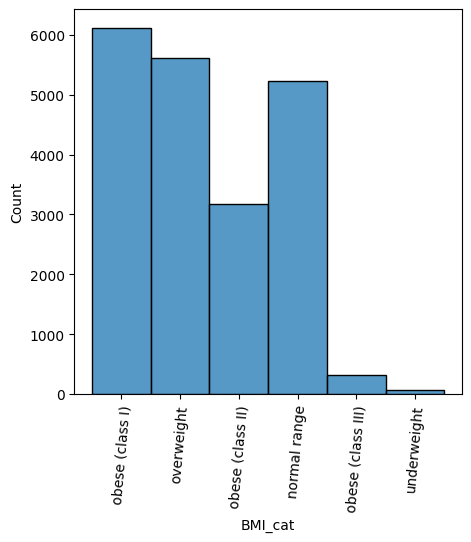

In [24]:
# plotting the BMI stages in a histplot to see the distribution 
fig, ax = plt.subplots(1,1, figsize=(5,5))
sns.histplot(data=df_disease, x="BMI_cat")
ax.tick_params(axis='x', rotation=85)

## 2.1.1 - Feature engineering blodtryck

https://www.bloodpressureuk.org/your-blood-pressure/understanding-your-blood-pressure/what-do-the-numbers-mean/

![alternative text](..\assets\bp-chart-500x655.gif)

according to this chart. 
- lowest blood pressure is ap_hi 70 and ap_lo 40
- highest blood pressure is ap_hi 190 and ap_lo 100

In [25]:
# checking the highest ap_hi
df_disease[df_disease["ap_hi"] == df_disease["ap_hi"].max()] 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_cat
46912,66998,46.3,2,180,78.0,14020,90,1,1,0,0,1,1,24.07,normal range


In [26]:
# checking the lowest ap_hi
df_disease[df_disease["ap_hi"] == df_disease["ap_hi"].min()]  

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_cat
20536,29313,42.66,1,153,54.0,-100,70,1,1,0,0,1,0,23.07,normal range


In [27]:
# checking the highest ap_lo
df_disease[df_disease["ap_lo"] == df_disease["ap_lo"].max()] 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_cat
43326,61901,63.58,1,160,105.0,200,11000,1,1,0,0,1,1,41.02,obese (class III)


In [28]:
# checking the lowest ap_lo
df_disease[df_disease["ap_lo"] == df_disease["ap_lo"].min()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_cat
2014,2845,62.18,2,167,59.0,906,0,1,1,0,0,1,0,21.16,normal range
23867,34120,44.17,1,161,92.0,906,0,2,1,0,0,1,1,35.49,obese (class II)
25454,36325,49.15,2,176,73.0,12,0,1,1,0,0,1,0,23.57,normal range
27686,39577,64.06,2,180,73.0,140,0,1,1,1,1,1,1,22.53,normal range
40330,57646,55.64,1,162,50.0,309,0,1,1,0,0,1,0,19.05,normal range
42397,60565,49.25,2,176,69.0,906,0,1,1,0,0,1,0,22.28,normal range
48049,68612,52.05,1,160,84.0,121,0,1,1,0,0,0,1,32.81,obese (class I)


I can see that there are some really big outliers in this data set. There are many ap_lo with 0 for example. Also the max amounts are in their 1000's

In [29]:
# filtering out values in ap_hi which are under 70 and over 190
df_disease = df_disease[ (df_disease["ap_hi"] >= 70) & (df_disease["ap_hi"] <= 190)]
# filtering out values in ap_lo which are under 40 and over
df_disease = df_disease[ (df_disease["ap_lo"] >= 40) & (df_disease["ap_lo"] <= 100)]

In [57]:
df_disease["ap_hi"].describe()

count    19788.000000
mean       127.497726
std         16.924002
min         70.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        190.000000
Name: ap_hi, dtype: float64

In [58]:
df_disease["ap_lo"].describe()

count    19788.000000
mean        81.584597
std          9.297543
min         40.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        100.000000
Name: ap_lo, dtype: float64

I will now create a column that will catorgorize the different types of stages according to Blood pressure. These catorgories are: 

- Healthy : Systolic < 120 and Diastolic < 80
- Elevated : Systolic 120 > 129 and Diastolic < 80
- Stage 1 hypertension: Systolic 130 > 139 or Diastolic 80 > 89
- Stage 2 hypertension: Systolic 140 > or Diastolic 90 >
- Hypertension: Systolic > 180 or Diastolic > 120

In [33]:
# creating a lambda function that takes in two arguments and setting the threshold for each category 

bp_category = lambda systolic, diastolic: (
    "Healthy" if (systolic < 120) and (diastolic < 80) else
    "Elevated" if (systolic >= 120 and systolic <= 129) and (diastolic < 80) else
    "Stage 1" if ((systolic >= 130 and systolic <= 139) or (diastolic >= 80 and diastolic <= 89)) else
    "Stage 2" if ((systolic >= 140) or (diastolic >= 90)) else
    "Hypertension"
)

# I then execute the lambda but use the associated columns within the function and create a new category
df_disease["bp_category"] = df_disease.apply(lambda row: bp_category(row["ap_hi"], row["ap_lo"]), axis=1)

In [34]:
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_cat,bp_category
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1,34.93,obese (class I),Stage 2
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1,28.71,overweight,Stage 2
7,12,61.83,2,178,95.0,130,90,3,3,0,0,1,1,29.98,overweight,Stage 1
22,32,63.10,1,158,90.0,145,85,2,2,0,0,1,1,36.05,obese (class II),Stage 1
34,46,60.07,2,173,82.0,140,90,3,1,0,0,0,1,27.40,overweight,Stage 2


I was able to come to these decisions with the different stages as I took into account the ranges of ap_hi (systolic) and ap_lo (diastolic) from the graph that I found in the beginning. I thought if I were able to find the correct ranges that were possible to measure, then it would make the categorization much easier and remove any possible outliers from the beginning.

## 2.20 Visualizing  diseases

In [35]:
# Creating a data frame with only positives for cardiovascular disease 

df_positive_car = df_disease[df_disease.cardio == 1] # removing the value 0 which is no in the data frame
df_positive_car["cardio"].describe()

count    10262.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: cardio, dtype: float64

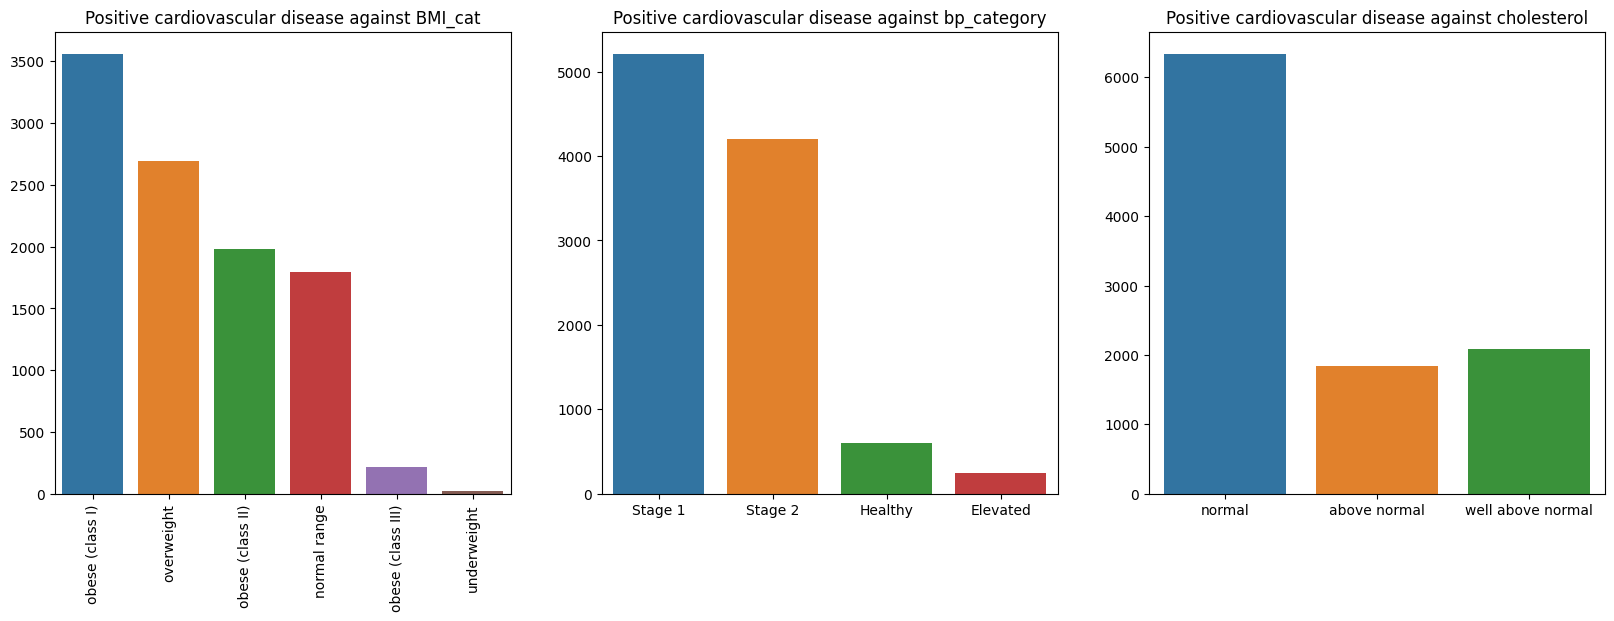

In [80]:
# creating a sub plot with 3 graphs
fig, axes = plt.subplots(1,3, figsize=(20, 6))

# creating a list with the column name and which axes it is to be plotted on
columns = [("BMI_cat", axes[0]), ("bp_category", axes[1]), ("cholesterol", axes[2])]

# creating a for loop to pass over the columns in which I have decided upon
for column, ax in columns:
    # taking a value count for the columns to be able to create the barplot
    sns.barplot(x=df_positive_car[column].value_counts().index, y =df_positive_car[column].value_counts().values, ax=ax)
    ax.set_title(f"Positive cardiovascular disease against {column}")
    
# renaming the cholesteral colums as the groups were represented with numbers
axes[2].set_xticklabels(["normal","above normal","well above normal"])

# rotating the labels on the first graph so it is readable
axes[0].tick_params(axis="x", labelrotation = 90)

plt.show();

# 2.2.1 

C:\Users\Sam Glass ITHS\AppData\Local\Temp\ipykernel_1284\972017564.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_disease.corr(), annot=False) # annot false will remove the values from the squares


<Axes: >

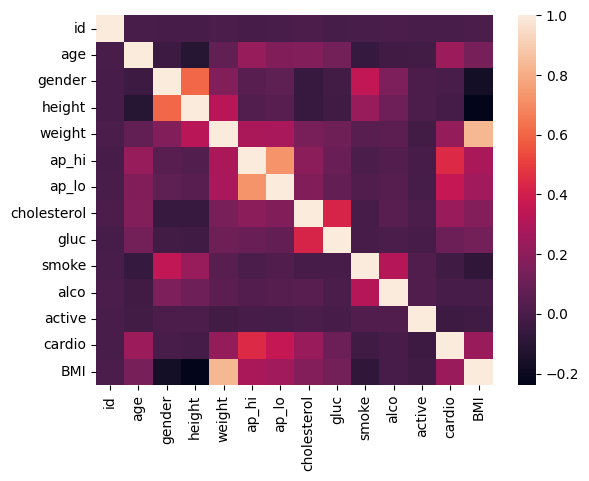

In [39]:
# creating a heatmap of the dataset to see look at correlation
sns.heatmap(df_disease.corr(), annot=False) # annot false will remove the values from the squares

# TODO Rewrite this. positive correlations means that if value goes up the so does the respective value. If it is a negative effect then when thaty value goes up the other value goes down     

As we can see from the heatmap there is not many features that have very strong correlations with each other. There are some that are quite high. These include: 

- The two features that correlate the most are weight and BMI. This is not strange as the BMI formula uses the wight variable to be able to calculate this. Also the higher or lower the BMI you have the heavier or lighter your weight will be.
-  ap- hi and ap_ lo, which represent Systolic and Diastolic blood readings were the second highest corelation. I think this is because they are very closely related when measuring blood pressure and they were also combined to give a categorization for each patients blood pressure status.
- The final correlation that was fairly strong was between gender and height. I think this is because that in general males are taller than woman.
- The correlation between ap_hi(Systolic blood pressure) and cardio were also over the 0.5 mark on the scale. I would assume that this is because those with a higher Systolic reading would be associated with the categorizations of the patients with a cardiovascular disease and the lower readings with the patients without a cardiovascular disease
- Cholesterol and Glucose had some correlation as well. This may be due to the fact that the higher or lower your cholesterol is can be due to how much Glucose(Sugar) is in your body 

In general the most features did not have outstanding corelation. Some even had no correlation or extremely low. for example: 

- Age and height, This can vary from genetics 
- gender and BMI, It does not matter what sex you are in relation to your BMI as people keep in different physical shapes

## Creating a Csv file of my dataframe

I will now create a csv file of the data frame that I have created and expended so I can start to create a prediction model within a new notebook file 

In [40]:
df_disease.to_csv("..\data\Heart_disease.csv", index=False)